# KURS ZŁOTEGO

In [1]:
import pandas as pd
from alpha_vantage.foreignexchange import ForeignExchange
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime
from time import sleep
from os import environ
import pytz

In [2]:
tz = pytz.timezone('Europe/Warsaw')
print(f'Ostatnia aktualizacja: {datetime.now(tz=tz)}')

Ostatnia aktualizacja: 2023-10-11 14:04:52.871121+02:00


In [3]:
AV_API_KEY = environ['AV_API_KEY']
cc = ForeignExchange(key=AV_API_KEY, output_format='pandas')

currencies = ['EURPLN', 'USDPLN', 'CHFPLN', 'GBPPLN']

class Currency:
    def __init__(self, currency: str, data):
        self.currency = currency
        self.data = data
    
    @classmethod
    def load_currency(cls, currency):
        while True:
            try:
                df, _ = cc.get_currency_exchange_daily(currency[:3], currency[3:])
                df = df.sort_index(ascending=True)
                df.columns = ["open", "high", "low", "close"]
                return cls(currency, df)
            except ValueError:
                delay = 15
                print(f'Waiting {delay} seconds before the next API call for {currency}...')
                sleep(15)
                continue
            break


currencies_data = {}

for currency in currencies:
    currencies_data[currency] = Currency.load_currency(currency)
print('SUCCESS')

SUCCESS


In [4]:
print(f'Ostatni kurs z dnia {max(currencies_data["EURPLN"].data.index).strftime("%Y-%m-%d")}')
for currency in currencies_data:
    print(f'{currency}: {currencies_data[currency].data.loc[max(currencies_data[currency].data.index), "close"]}')

Ostatni kurs z dnia 2023-10-11
EURPLN: 4.51473
USDPLN: 4.25815
CHFPLN: 4.7142
GBPPLN: 5.23286


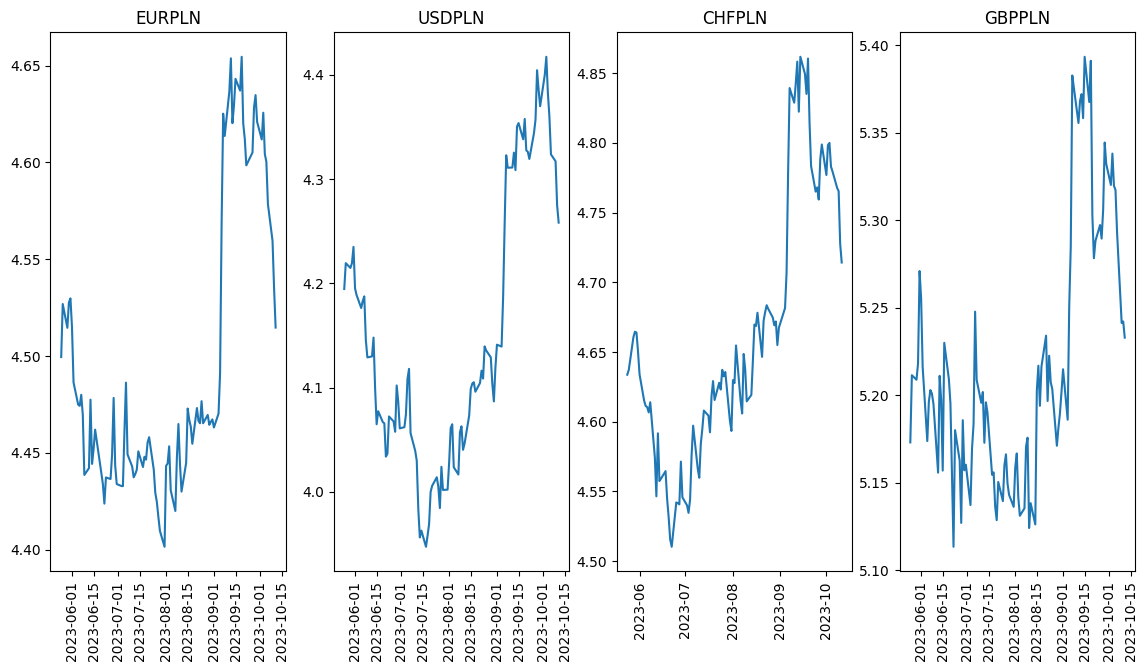

In [5]:
plt.figure(figsize=(14, 7))
plt.tight_layout()

for idx, currency_data in enumerate(currencies_data.items(), 1):
    currency, data = currency_data
    plt.subplot(1, len(currencies_data), idx)
    plt.xticks(rotation=90)
    plt.title(currency)
    plt.plot(data.data["close"])

plt.show()

/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future ve

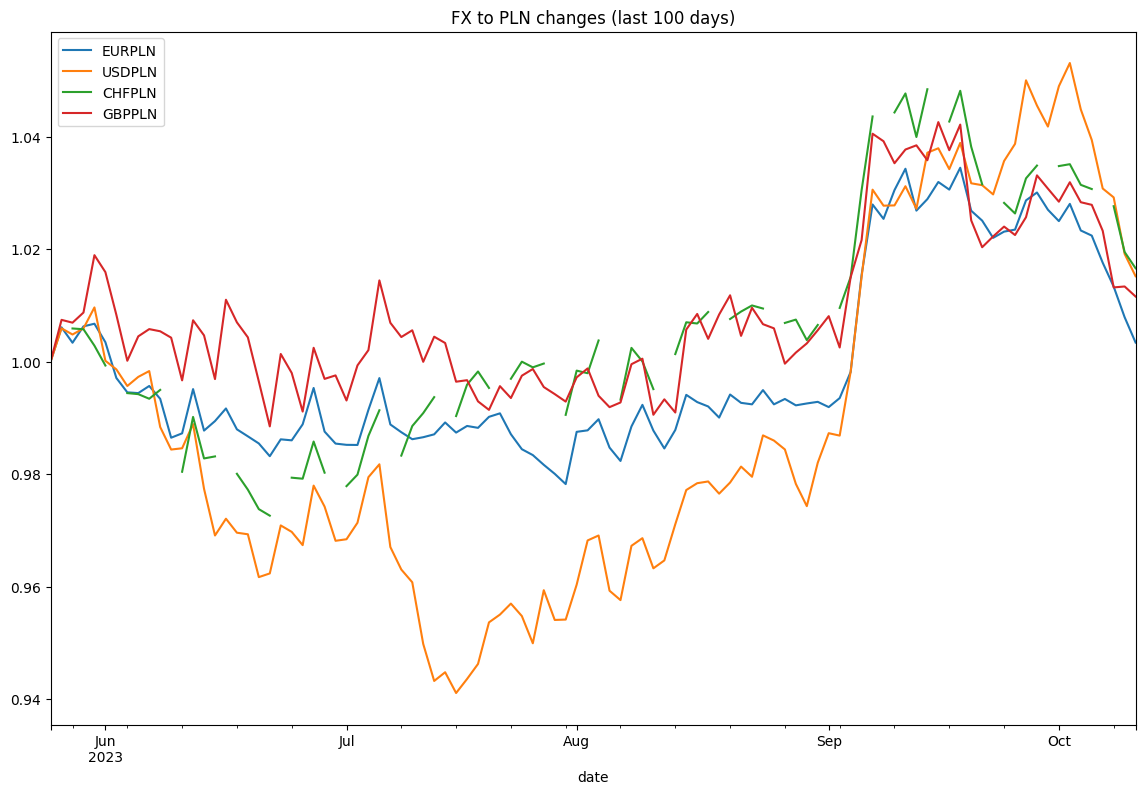

In [6]:
fx_based = pd.DataFrame(columns = currencies)

for idx, currency_data in enumerate(currencies_data.items(), 1):
    currency, data = currency_data
    fx_based[currency] = data.data["close"]
fx_based = fx_based.div(fx_based.iloc[0])

fx_based.plot(title='FX to PLN changes (last 100 days)', figsize = (14,9))
plt.show()

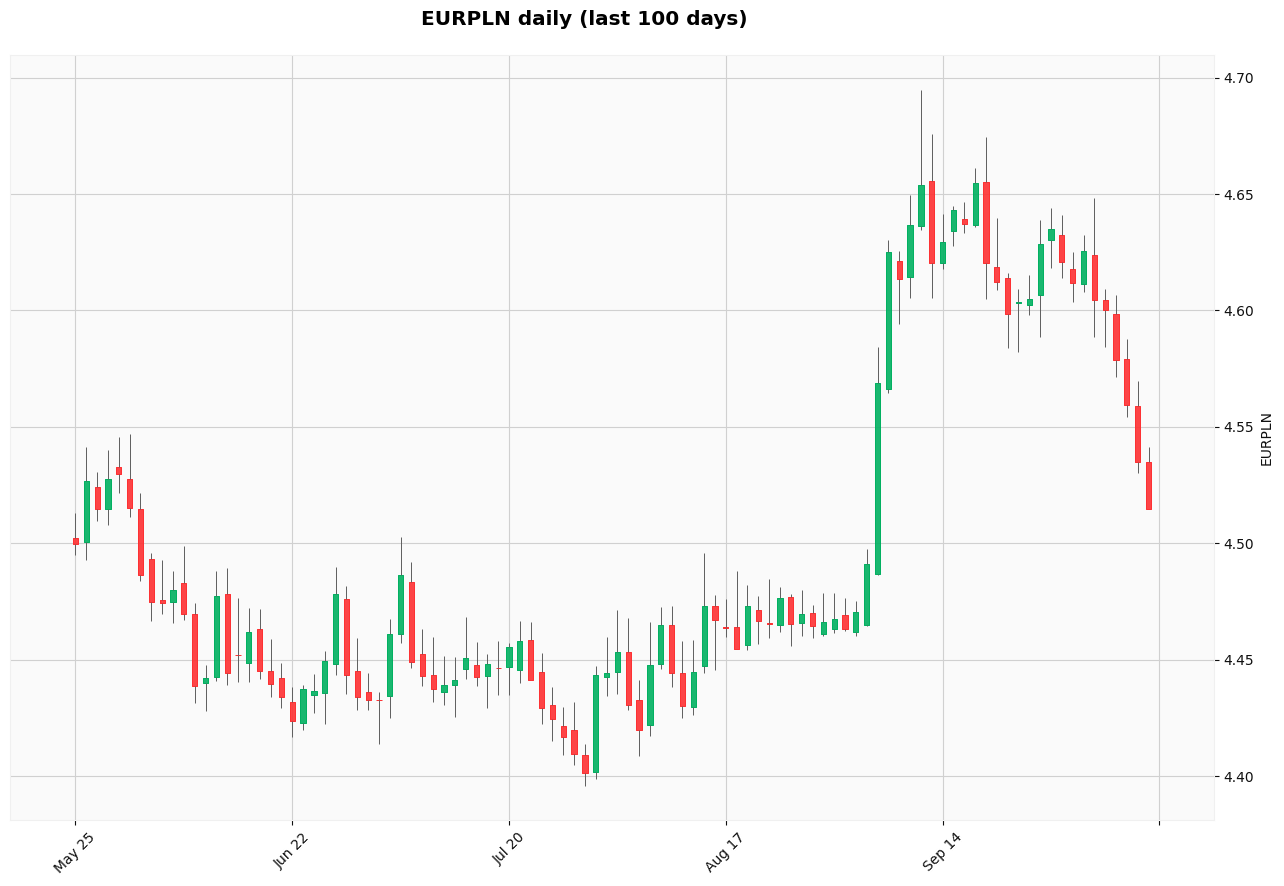

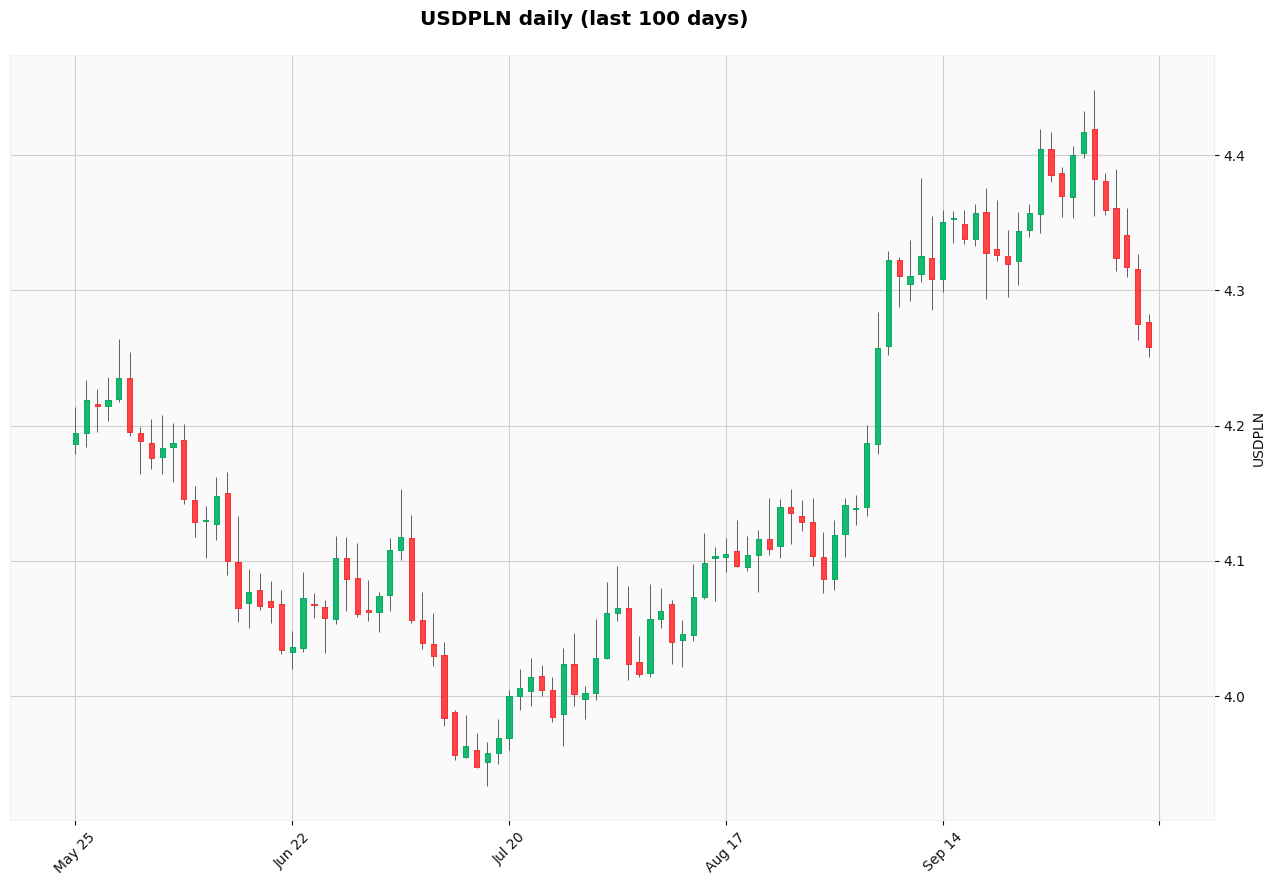

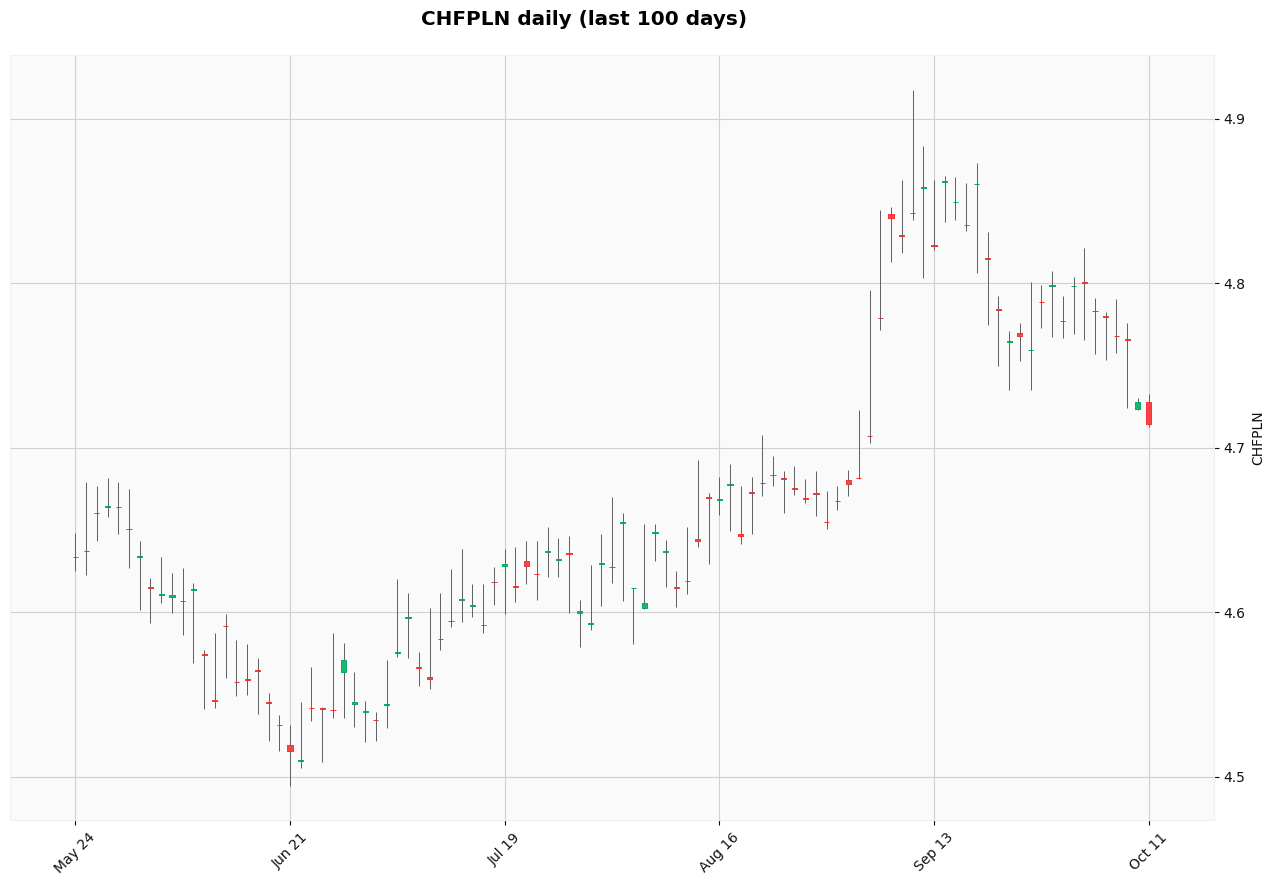

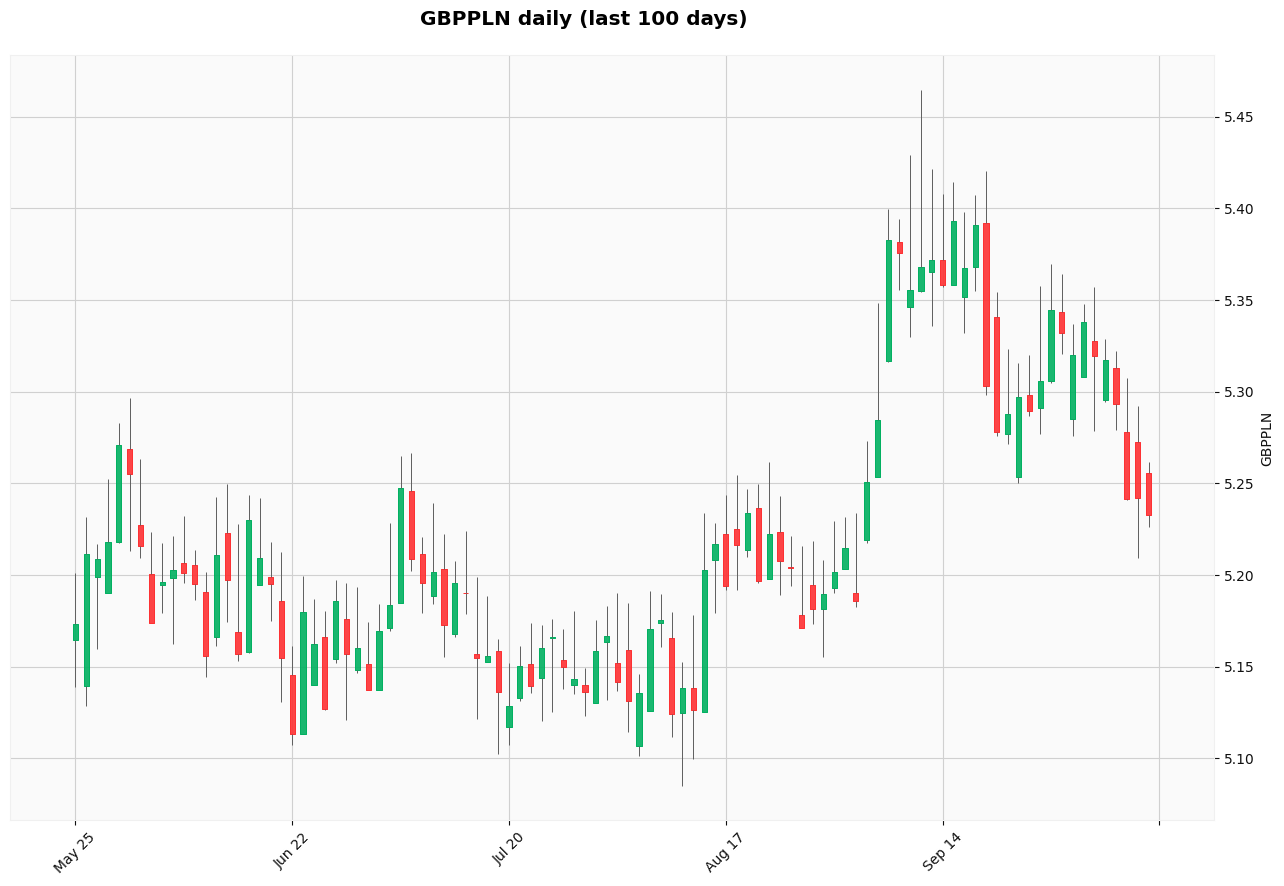

In [7]:
for currency_data in currencies_data.items():
    currency, data = currency_data
    
    combined = pd.DataFrame()
    combined['close'] = data.data['close']
    mpf.plot(data.data,type='candle', scale_padding=0.5, style='yahoo', ylabel=currency, title=f'{currency} daily (last 100 days)', figsize=(14,9))
    mpf.show()